In [5]:
from matplotlib import pyplot as plt
%matplotlib notebook
import pytzer as pz
import numpy as np
import pandas as pd
import pickle

with open('pickles/simpytz_fpd.pkl','rb') as f:
    fpdbase,fpdp,err_cfs_both,fpd_sys_std = pickle.load(f)


<IPython.core.display.Javascript object>


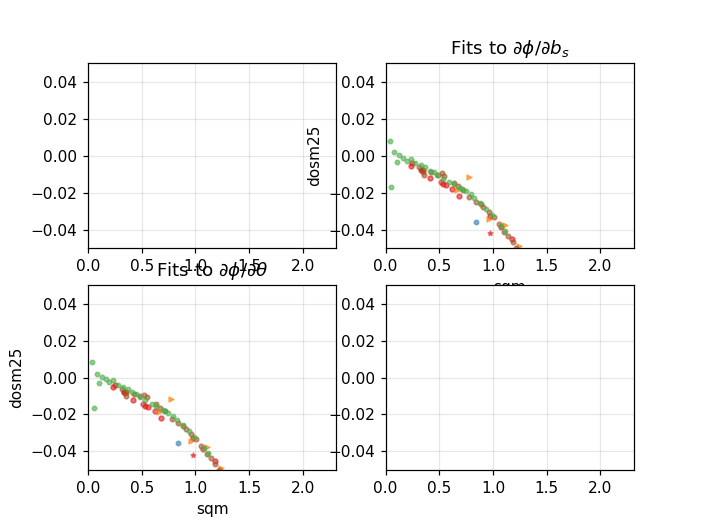

In [7]:
# Define markers and colours for different datasets
mrks = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
clrs = np.tile(np.array([[228,26,28],[55,126,184],[77,175,74],[152,78,163],[255,127,0],[166,86,40],
                                 [247,129,191],[153,153,153]]) / 255,(10,1))
fmrk = {src: mrks[S] for S,src in enumerate(fpdp.index.levels[1])}
fclr = {src: clrs[S] for S,src in enumerate(fpdp.index.levels[1])}
#vmrk = {src: mrks[S] for S,src in enumerate(vplp.index.levels[1])}
#vclr = {src: clrs[S] for S,src in enumerate(vplp.index.levels[1])}

# Set up figures
fele = 'KCl'
fig,ax = plt.subplots(2,2)#, figsize=(12,8))

for src in fpdp.loc[fele].index:
    FSL = np.logical_and(fpdbase['ele'] == fele,fpdbase['src'] == src)
    
    if any(FSL):     
#        BL = np.logical_and(sqbx >= np.amin(fpd[FSL].sqm - 0.1),sqbx <= np.amax(fpd[FSL].sqm) + 0.1)
#        
#        # ax[0,0] Fits to m
#        fpdbase[FSL].plot.scatter('sqm','dosm25', ax=ax[0,0], c=[fclr[src]], marker=fmrk[src], s=10,
#                                  alpha=0.6)
#        #if np.logical_and(DC['m'][ele][src] < DC['bs'][ele][src],
#        #                  DC['m'][ele][src] < DC['fpd'][ele][src]):
#        if 1 == 0:
#            Bls = '-'
#            addex = '* '
#        else:
#            Bls = ':'
#            addex = '  '
#        print(addex + 'D(m  ) = ' + '%+.4f' % np.array(DD['m'][ele][src]*1e3) + ' g      at cost ' \
#              + '%+.4f' % np.array(DC['m'][ele][src]*1e3) + ' for ' + src)
#        ax[0,0].plot(sqbx[BL],fx_dosm_dm(xfpd[BL],bx[BL],nu[BL]) * DD['m'][fele][src], c=fclr[src], ls=Bls)
#        ax[0,0].set_title(r'Fits to $\partial \phi / \partial m$')
        
        # ax[0,1] Fits to bs
        fpdbase[FSL].plot.scatter('sqm','dosm25', ax=ax[0,1], c=[fclr[src]], marker=fmrk[src], s=10,
                                  alpha=0.6)
#        #if np.logical_and(DC['bs'][ele][src] < DC['m'][ele][src],
#        #                  DC['bs'][ele][src] < DC['fpd'][ele][src]):
#        if (DC['bs'][ele][src] < DC['fpd'][ele][src]) or (fpdp.loc[ele,src]['len']['m'] < 5):
#            Bls = '-'
#            addex = '* '
#        else:
#            Bls = ':'
#            addex = '  '
#        print(addex + 'D(bs ) = ' + '%+.4f' % np.array(DD['bs'][ele][src]) + ' mol/kg at cost ' \
#              + '%+.4f' % np.array(DC['bs'][ele][src]*1e3) + ' for ' + src)
#        ax[0,1].plot(sqbx[BL],fx_dosm_dbs(xfpd[BL],bx[BL],nu[BL]) * DD['bs'][fele][src], c=fclr[src], ls=Bls)
        ax[0,1].set_title(r'Fits to $\partial \phi / \partial b_s$')
        
        # ax[1,0] Fits to fpd
        fpdbase[FSL].plot.scatter('sqm','dosm25', ax=ax[1,0], c=[fclr[src]], marker=fmrk[src], s=10,
                                  alpha=0.6)
#        #if np.logical_and(DC['fpd'][ele][src] < DC['m'][ele][src],
#        #                  DC['fpd'][ele][src] < DC['bs'][ele][src]):
#        if (DC['fpd'][ele][src] < DC['bs'][ele][src]) and (fpdp.loc[ele,src]['len']['m'] >= 5):
#            Bls = '-'
#            addex = '* '
#        else:
#            Bls = ':'  
#            addex = '  '
#        print(addex + 'D(fpd) = ' + '%+.4f' % np.array(DD['fpd'][ele][src]) + ' K      at cost ' \
#              + '%+.4f' % np.array(DC['fpd'][ele][src]*1e3) + ' for ' + src)
#        ax[1,0].plot(sqbx[BL],fx_dosm_dfpd(xfpd[BL],bx[BL],nu[BL]) * DD['fpd'][fele][src], c=fclr[src], ls=Bls)
        ax[1,0].set_title(r'Fits to $\partial \phi / \partial \theta$')
        
#        # ax[1,1] Simulated datasets
#        ax[1,1].scatter(np.sqrt(Ufpd_m[fele][FSL]),
#                        Ufpd_osm[fele][FSL] - pweb.pz.osm(fpd[FSL].ele,Ufpd_m[fele][FSL],
#                                                          np.full(np.size(Ufpd_m[fele][FSL]),298.15)),
#                        c=[fclr[src]], marker=fmrk[src], s=20, label=src)
#        ax[1,1].set_title('Example simulated dataset')
#        ax[1,1].legend()
#        
#    print('')
        
for r in range(2):
    for c in range(2):
        ax[r,c].grid(alpha=0.3)
        ax[r,c].set_xlim((0,np.sqrt(pz.prop.solubility25[fele] + 0.5)))
        ax[r,c].set_ylim((-0.05,0.05))
        